# Cleaning and Loading COVID data sets and preparing them for analysis

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns

#from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file C:\Users\Jay Cao\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Jay Cao\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Jay Cao\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You 

### Loading the Covid data from https://github.com/owid/covid-19-data/tree/master/public/data

In [2]:
file_path = Path("Data\owid-covid-data-20210928.csv")
covid_data = pd.read_csv(file_path)
#creating a new field 'Date' field off the back of 'date' and making it only as a date format of YYYY-MM-DD
covid_data['Date'] = pd.to_datetime(covid_data['date']).dt.date 
#creating a dataframe that has the aggregated total for the entire world for correlation purposes
world_data = covid_data[covid_data['iso_code']=='OWID_WRL']
world_c19 = world_data[['Date','total_cases','reproduction_rate','new_cases']]
world_c19 = world_c19.rename(columns={'total_cases':'World Total Cases','reproduction_rate':'World Reproduction Rate','new_cases':'World New Cases'}).set_index('Date')
world_c19.head()

japan = covid_data[covid_data['iso_code']=='JPN']
japan = japan[['Date','total_cases','reproduction_rate','new_cases']]
japan = japan.rename(columns={'total_cases':'Japan Total Cases','reproduction_rate':'Japan Reproduction Rate','new_cases':'Japan New Cases'}).set_index('Date')
japan.head()

usa = covid_data[covid_data['iso_code']=='USA']
usa = usa[['Date','total_cases','reproduction_rate','new_cases']]
usa = usa.rename(columns={'total_cases':'USA Total Cases','reproduction_rate':'USA Reproduction Rate','new_cases':'USA New Cases'}).set_index('Date')
usa.head()

USA Total Cases  USA Reproduction Rate  USA New Cases
Date                                                             
2020-01-22              1.0                    NaN            NaN
2020-01-23              1.0                    NaN            0.0
2020-01-24              2.0                    NaN            1.0
2020-01-25              2.0                    NaN            0.0
2020-01-26              5.0                    NaN            3.0

### Loading data for https://www.kaggle.com/mattiuzc/commodity-futures-price-history

In [3]:
file_path = Path("Data\Sugar.csv")
sugar_data = pd.read_csv(file_path)
#creating a new field 'Date' field off the back of 'date' and making it only as a date format of YYYY-MM-DD
sugar_data['Date'] = pd.to_datetime(sugar_data['Date']).dt.date
sugar = sugar_data[['Date', 'Close']].set_index('Date')
sugar = sugar.rename(columns={'Close':'Sugar Close'})
sugar.head()

Sugar Close
Date                   
2000-03-01         5.08
2000-03-02         4.96
2000-03-03         5.05
2000-03-06         5.04
2000-03-07         5.07

In [4]:
file_path = Path("Data\Brent Crude Oil.csv")
brent = pd.read_csv(file_path, parse_dates=['Date'])
#creating a new field 'Date' field off the back of 'date' and making it only as a date format of YYYY-MM-DD
brent['Date'] = pd.to_datetime(brent['Date']).dt.date
brent = brent[['Date', 'Close']].set_index('Date')
brent = brent.rename(columns={'Close':'Brent Crude Oil Close'})
brent.head()

Brent Crude Oil Close
Date                             
2007-07-30              75.739998
2007-07-31              77.050003
2007-08-01              75.349998
2007-08-02              75.760002
2007-08-03              74.750000

In [5]:
file_path = Path("Data\Gold.csv")
gold = pd.read_csv(file_path, parse_dates=['Date'])
#creating a new field 'Date' field off the back of 'date' and making it only as a date format of YYYY-MM-DD
gold['Date'] = pd.to_datetime(gold['Date']).dt.date
gold = gold[['Date', 'Close']].set_index('Date')
gold = gold.rename(columns={'Close':'Gold Close'})
gold.head()

Gold Close
Date                  
2000-08-30  273.899994
2000-08-31  278.299988
2000-09-01  277.000000
2000-09-04         NaN
2000-09-05  275.799988

### Laoding data from Google Finance for the major indices around the world

In [6]:
file_path = Path("Data\DOWJONES - DJI.csv")
dji = pd.read_csv(file_path, parse_dates=['Date'])
#creating a new field 'Date' field off the back of 'date' and making it only as a date format of YYYY-MM-DD
dji['Date'] = pd.to_datetime(dji['Date']).dt.date
dji = dji[['Date', 'Close']].set_index('Date')
dji = dji.rename(columns={'Close':'DJI Close'})
dji.head()

DJI Close
Date                 
1990-01-02    2810.15
1990-01-03    2809.73
1990-01-04    2796.08
1990-01-05    2773.25
1990-01-08    2794.37

In [7]:
file_path = Path("Data\^N225.csv")
n225 = pd.read_csv(file_path, parse_dates=['Date'])
#creating a new field 'Date' field off the back of 'date' and making it only as a date format of YYYY-MM-DD
n225['Date'] = pd.to_datetime(n225['Date']).dt.date
n225 = n225[['Date', 'Close']].set_index('Date')
n225 = n225.rename(columns={'Close':'Nikkei 225 Close'})
n225.head()

Nikkei 225 Close
Date                        
1990-01-04      38712.878906
1990-01-05      38274.761719
1990-01-08      38294.960938
1990-01-09      37951.460938
1990-01-10      37696.511719

### Preparing the dataframes for correlation and plotting

In [8]:
#Combining all the dataframes above using the index with dates that exists across all dataframes
combined_df = pd.concat([n225, japan, dji, usa, sugar, gold, brent, world_c19], axis="columns", join="inner")
combined_df.head()

Nikkei 225 Close  Japan Total Cases  Japan Reproduction Rate  \
Date                                                                       
2020-01-22      24031.349609                2.0                      NaN   
2020-01-23      23795.439453                2.0                      NaN   
2020-01-24      23827.179688                2.0                      NaN   
2020-01-27      23343.509766                4.0                      NaN   
2020-01-28      23215.710938                7.0                      NaN   

            Japan New Cases  DJI Close  USA Total Cases  \
Date                                                      
2020-01-22              NaN   29186.27              1.0   
2020-01-23              0.0   29160.09              1.0   
2020-01-24              0.0   28989.73              2.0   
2020-01-27              0.0   28535.80              5.0   
2020-01-28              3.0   28722.85              5.0   

            USA Reproduction Rate  USA New Cases  Sugar Close   Gold Close  \
Date                                                                         
2020-01-22                    NaN            NaN        14.66  1555.300049   
2020-01-23                    NaN            0.0        14.57  1564.599976   
2020-01-24                    NaN            1.0        14.39  1571.099976   
2020-01-27                    NaN            0.0        14.21  1576.800049   
2020-01-28                    NaN            0.0        14.54  1569.199951   

            Brent Crude Oil Close  World Total Cases  World Reproduction Rate  \
Date                                                                            
2020-01-22              63.209999              557.0                      NaN   
2020-01-23              62.040001              655.0                     3.11   
2020-01-24              60.689999              941.0                     3.28   
2020-01-27              59.320000             2927.0                     3.54   
2020-01-28              59.509998             5578.0                     3.53   

            World New Cases  
Date                         
2020-01-22              0.0  
2020-01-23             98.0  
2020-01-24            286.0  
2020-01-27            809.0  
2020-01-28           2651.0

In [9]:
#creating the percentage change for each day and dropping off any null values
daily_change = combined_df.pct_change().dropna()
daily_change.head()

Nikkei 225 Close  Japan Total Cases  Japan Reproduction Rate  \
Date                                                                       
2020-03-06         -0.027163           0.150685                 0.050314   
2020-03-09         -0.050651           0.254762                -0.083832   
2020-03-10          0.008547           0.110057                -0.019608   
2020-03-11         -0.022704           0.094017                -0.053333   
2020-03-12         -0.044109           0.087500                -0.070423   

            Japan New Cases  DJI Close  USA Total Cases  \
Date                                                      
2020-03-06         0.718750  -0.009820         0.288043   
2020-03-09        -0.490909  -0.077857         1.506329   
2020-03-10         1.071429   0.048935         0.316498   
2020-03-11        -0.051724  -0.058555         0.466752   
2020-03-12         0.018182  -0.099884         0.382738   

            USA Reproduction Rate  USA New Cases  Sugar Close  Gold Close  \
Date                                                                        
2020-03-06              -0.013889      -0.311688    -0.029806    0.002640   
2020-03-09              -0.061972       0.415094    -0.031490    0.002214   
2020-03-10               0.009009       1.506667    -0.001586   -0.009197   
2020-03-11               0.017857       0.941489    -0.026211   -0.010668   
2020-03-12              -0.005848       0.202740    -0.052202   -0.031741   

            Brent Crude Oil Close  World Total Cases  World Reproduction Rate  \
Date                                                                            
2020-03-06              -0.094419           0.039918                 0.060403   
2020-03-09              -0.240998           0.119746                 0.120253   
2020-03-10               0.083236           0.042230                 0.045198   
2020-03-11              -0.038420           0.064365                 0.048649   
2020-03-12              -0.071808           0.045747                 0.030928   

            World New Cases  
Date                         
2020-03-06         0.389638  
2020-03-09         0.067671  
2020-03-10         0.153791  
2020-03-11         0.588516  
2020-03-12        -0.243508

In [10]:
#with the percentage calculated, we're ready for correlation between all the indicators
new_combined_corr = daily_change.corr()
new_combined_corr

Nikkei 225 Close  Japan Total Cases  \
Nikkei 225 Close                 1.000000          -0.054566   
Japan Total Cases               -0.054566           1.000000   
Japan Reproduction Rate          0.143949          -0.204193   
Japan New Cases                  0.021696          -0.116681   
DJI Close                        0.323432          -0.077429   
USA Total Cases                 -0.114947           0.586114   
USA Reproduction Rate           -0.163004          -0.586797   
USA New Cases                   -0.168961           0.123935   
Sugar Close                      0.125226          -0.170803   
Gold Close                       0.093715           0.106886   
Brent Crude Oil Close            0.182139          -0.182256   
World Total Cases                0.020446           0.734499   
World Reproduction Rate         -0.197278          -0.278856   
World New Cases                 -0.195486          -0.049168   

                         Japan Reproduction Rate  Japan New Cases  DJI Close  \
Nikkei 225 Close                        0.143949         0.021696   0.323432   
Japan Total Cases                      -0.204193        -0.116681  -0.077429   
Japan Reproduction Rate                 1.000000         0.264453   0.027016   
Japan New Cases                         0.264453         1.000000   0.046688   
DJI Close                               0.027016         0.046688   1.000000   
USA Total Cases                         0.144361        -0.061705  -0.328161   
USA Reproduction Rate                   0.078461        -0.001848  -0.066503   
USA New Cases                           0.080406         0.325997  -0.187171   
Sugar Close                             0.152067         0.108764   0.168171   
Gold Close                              0.097400         0.109259   0.128627   
Brent Crude Oil Close                  -0.056588         0.047465   0.387231   
World Total Cases                       0.115604        -0.126824  -0.140059   
World Reproduction Rate                 0.069214         0.027876  -0.132273   
World New Cases                         0.057137         0.470243   0.028542   

                         USA Total Cases  USA Reproduction Rate  \
Nikkei 225 Close               -0.114947              -0.163004   
Japan Total Cases               0.586114              -0.586797   
Japan Reproduction Rate         0.144361               0.078461   
Japan New Cases                -0.061705              -0.001848   
DJI Close                      -0.328161              -0.066503   
USA Total Cases                 1.000000              -0.401872   
USA Reproduction Rate          -0.401872               1.000000   
USA New Cases                   0.521027               0.008255   
Sugar Close                    -0.090946               0.063374   
Gold Close                      0.133175              -0.174162   
Brent Crude Oil Close          -0.266325               0.023834   
World Total Cases               0.847372              -0.542247   
World Reproduction Rate        -0.010629               0.569848   
World New Cases                 0.216740              -0.014709   

                         USA New Cases  Sugar Close  Gold Close  \
Nikkei 225 Close             -0.168961     0.125226    0.093715   
Japan Total Cases             0.123935    -0.170803    0.106886   
Japan Reproduction Rate       0.080406     0.152067    0.097400   
Japan New Cases               0.325997     0.108764    0.109259   
DJI Close                    -0.187171     0.168171    0.128627   
USA Total Cases               0.521027    -0.090946    0.133175   
USA Reproduction Rate         0.008255     0.063374   -0.174162   
USA New Cases                 1.000000     0.022487    0.017166   
Sugar Close                   0.022487     1.000000    0.138013   
Gold Close                    0.017166     0.138013    1.000000   
Brent Crude Oil Close         0.003772     0.312552    0.048192   
World Total Cases             0.346031    -0.090199  

### Question: What is the correlation between the commodity prices, indices and covid cases

<AxesSubplot:>

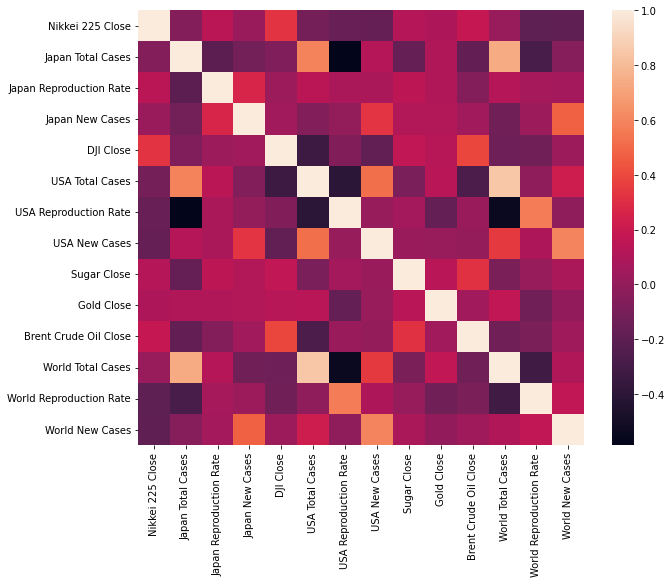

In [11]:
#visualising the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(new_combined_corr)

### Conclusion: COVID is far from being correlated with any of the indices and commodity prices at the country and world level.

### using covid data with other attributes associated to link it to a finance perspective

In [12]:
#covid_data
analysis = covid_data[['date','continent','location','total_cases','population_density','gdp_per_capita','reproduction_rate','total_vaccinations_per_hundred']]#.set_index('Date')
# removing any noise from the data set
analysis = analysis[(analysis['location'] != analysis['continent']) & (~analysis['continent'].isnull())]
analysis = analysis.fillna(0)
#analysis.info()
continent = analysis.groupby(['location'])['total_cases','population_density','gdp_per_capita','reproduction_rate','total_vaccinations_per_hundred'].mean().reset_index().sort_values(by='total_cases')
continent.head()

location  total_cases  population_density  gdp_per_capita  \
134              Montserrat          0.0               0.000             0.0   
201                 Tokelau          0.0               0.000             0.0   
149         Northern Cyprus          0.0               0.000             0.0   
28   British Virgin Islands          0.0             207.973             0.0   
82                 Guernsey          0.0               0.000             0.0   

     reproduction_rate  total_vaccinations_per_hundred  
134                0.0                        4.142342  
201                0.0                        2.463509  
149                0.0                        2.673131  
28                 0.0                       11.335943  
82                 0.0                       37.056885

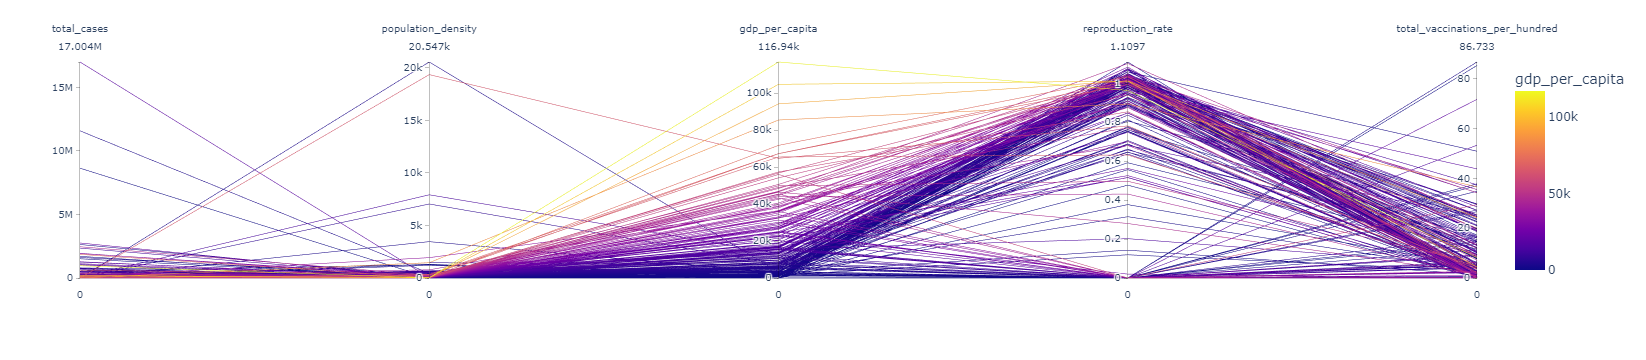

In [33]:
px.parallel_coordinates(continent, color = 'gdp_per_capita')

### Question: What is the relationship between the population density and total number of cases per country, the assumption is that the higher the population density, the higher the number of covid cases in each country.

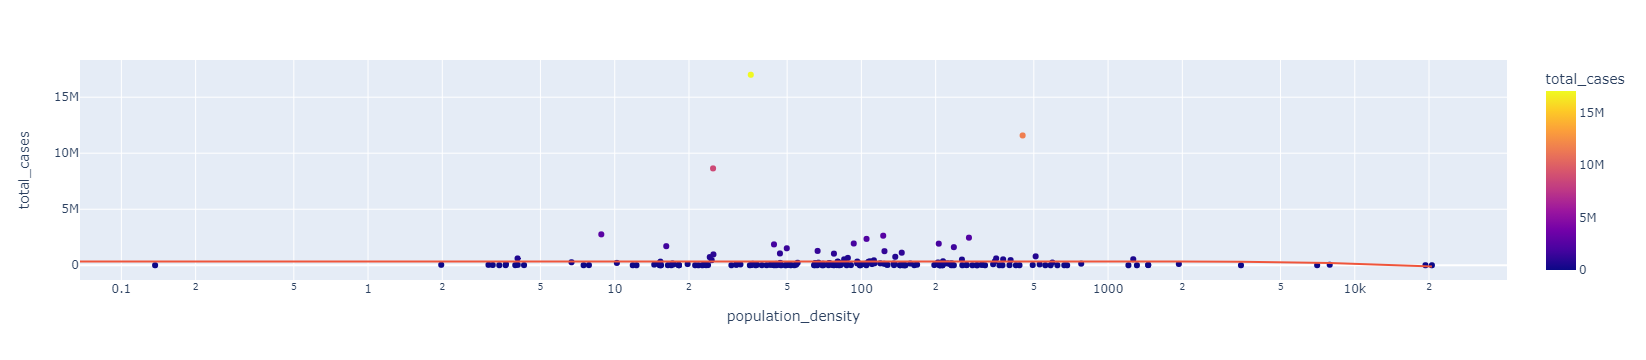

In [34]:
fig = px.scatter(continent, x="population_density", y="total_cases", trendline="ols", color="total_cases", hover_data=['location'], log_x=True)
fig.show()

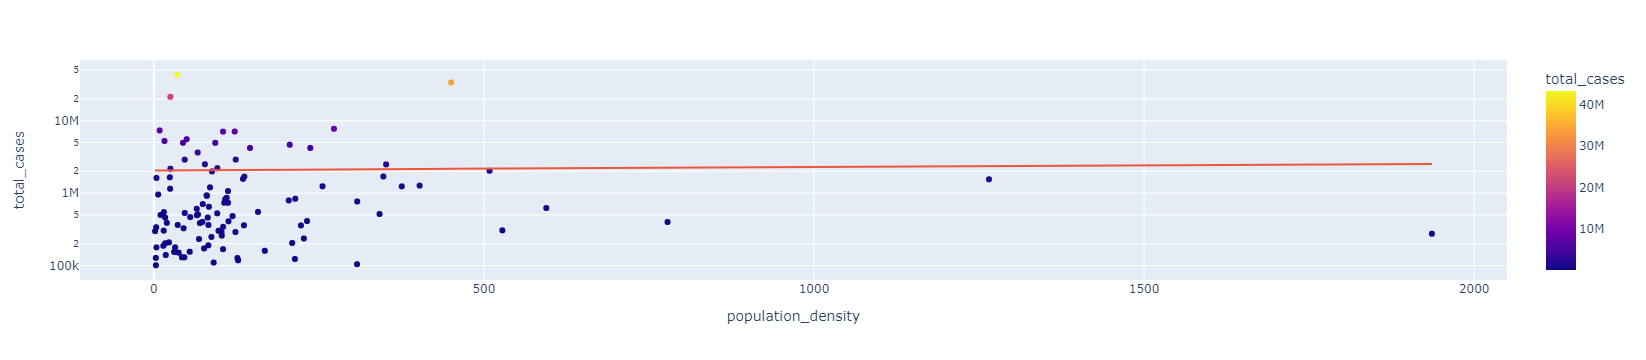

In [14]:
density_pop = analysis[['date','location','total_cases','population_density','gdp_per_capita','reproduction_rate','total_vaccinations_per_hundred']]
density_pop = density_pop[(density_pop['total_cases'] > 100000) & (density_pop['population_density'] > 0) & (density_pop['date'] =='2021-09-27')]
fig0 = px.scatter(density_pop, x="population_density", y="total_cases", trendline="ols", color="total_cases", hover_data=['location'], log_y=True)
fig0.show()

### Conclusion: Not a whole lot of correlation, there's almost a weak inverse relationship where the higher the number of cases the lower the population density.

### Question: What is the relationship between the total number of covid cases and GDP per capita? The assumption is that low GDP per capita would have higher covid cases.

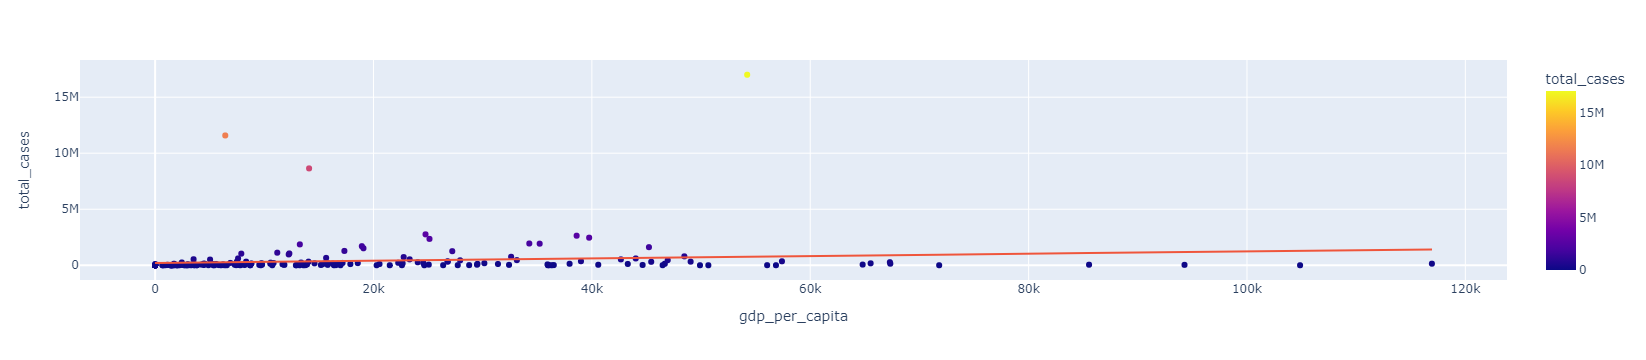

In [16]:
fig2 = px.scatter(continent, x="gdp_per_capita", y="total_cases", trendline="ols", color="total_cases", hover_data=['location'])
fig2.show()

### Conclusion: weak correlation between the total number of covid cases vs gdp per capita, there's a slight upward trend that the higher the GDP per Capita, the higher the number of cases.

### Question: What is the relationship between GDP per capita and the number of vaccines adminstered in each country? The assumption is that higher GDP countries would have the financial capacity to obtain vaccines for their citizens.

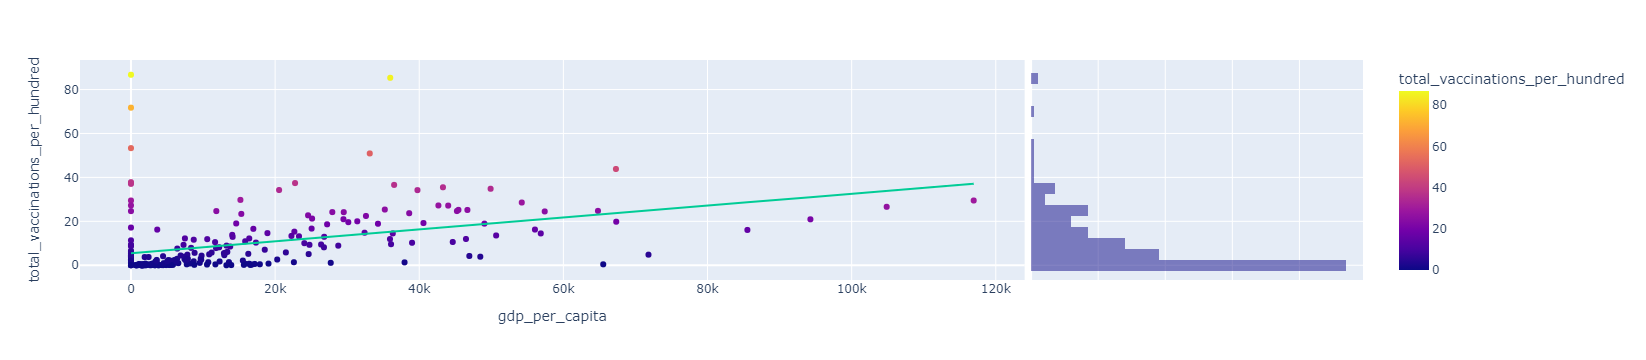

In [17]:
fig3= px.scatter(continent, x="gdp_per_capita", y="total_vaccinations_per_hundred", trendline="ols", color="total_vaccinations_per_hundred", hover_data=['location'],marginal_y="histogram")
fig3.show()

### Conclusion: There's a upward trend where the number of vaccines administered is postively related with GDP per capita, meaning the richer countries are more likely to have higher number of vaccines administered in their population.